Relaxing the BEC...


evolving the dGPE: 100%|███████████████████████| 50/50 [00:00<00:00, 508.16it/s]


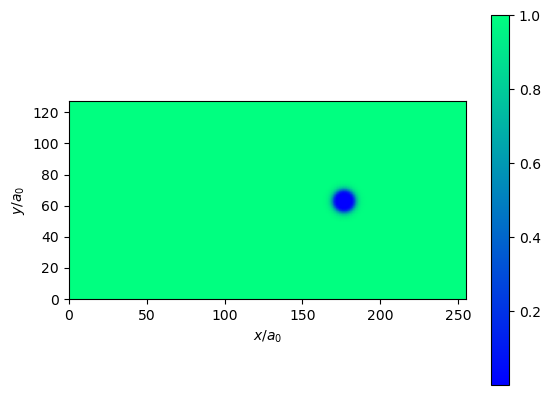

In [1]:
import sys
sys.path.append('/Users/jonasronning/Documents/Work/Numerics/Old Projects/ComFiT')


import numpy as np
import matplotlib.pyplot as plt
import comfit as cf

bec = cf.BEC(2,xRes=256,yRes=128,gamma=0,dt=0.1)

### task 1 and 2


bec.V0 = bec.calc_gaussian_stirring_potential(5, 4, [bec.xmid+50,bec.ymid] )

bec.conf_initial_condition_Thomas_Fermi()

bec.evolve_relax_BEC(50, method='ETD2RK') 

bec.plot_field(np.abs(bec.psi)**2,cmap_symmetric=False,colormap = 'winter')
plt.show()

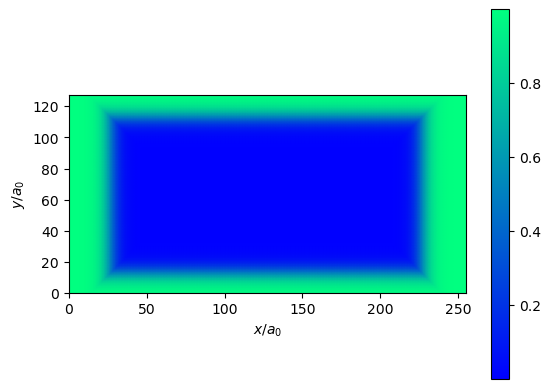

In [2]:
# task 3
bec.conf_dissipative_frame(wx=100,wy=50)

bec.plot_field(bec.gamma,cmap_symmetric=False,colormap = 'winter')
plt.show()




In [3]:
#task 4
vel_x = 0.40


t_max = 300
timesteps = int(t_max/bec.dt)

bec.evolve_comoving_dGPE(timesteps,vel_x,method='ETD4RK')
N=10
psi_old = bec.psi
bec.evolve_comoving_dGPE(N,vel_x)
dt_psi = (bec.psi-psi_old)/(N*bec.dt)

nodes = bec.calc_vortex_nodes(dt_psi)

evolving the dGPE in the comoving frame: 100%|█| 1000/1000 [00:08<00:00, 122.85i
evolving the dGPE in the comoving frame: 100%|█| 10/10 [00:00<00:00, 238.36it/s]

(256, 128)
(256, 128)
(256, 128)


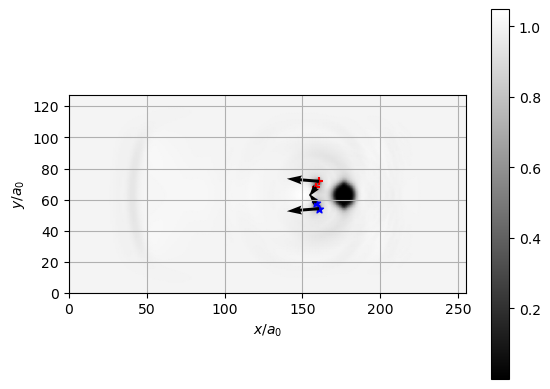

In [4]:
ax=bec.plot_field(np.abs(bec.psi)**2,cmap_symmetric=False,colormap = 'gray')
bec.plot_vortex_nodes(nodes,ax)
plt.show()